In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importamos los csv con pandas

In [180]:
dftest = pd.read_csv("hospitalizaciones_test.csv")
dftrain = pd.read_csv("hospitalizaciones_train.csv")

In [181]:
dftest.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [182]:
dftrain.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


"Stay (in days)" = "pred" tiene que ser menor o igual a 8 para valor 0 y mayor de 8 para valor 1

In [183]:
dftrain["Stay (in days)"] = np.where(dftrain["Stay (in days)"]>8,1,0)   #cambio de valores en las filas
dftrain = dftrain.rename(columns={"Stay (in days)":"pred"}) #cambio de nombre de columna

la columna Age, tiene un promedio de edad del paciente, en este caso, lo normalice por su media

In [184]:
df = dftrain["Age"].str.split('-', expand=True)
df[0] = df[0].astype("int32")
df[1] = df[1].astype("int32")
df = ((df[0]+df[1])/2)
df = df.astype("int32")

aqui pasamos el valor a la columna Age

In [185]:
dftrain["Age"] = df

asi va quedando

In [186]:
dftrain

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,pred
0,4,gynecology,D,Dr Sophia,0,33070,45,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,35,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,25,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,35,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,75,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,35,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,25,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,25,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,25,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


utilizo label encoder para convertir las variables categoricas en enteros

In [187]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dftrain.Department = le.fit_transform(dftrain.Department)
dftrain.Ward_Facility_Code = le.fit_transform(dftrain.Ward_Facility_Code)
dftrain.doctor_name = le.fit_transform(dftrain.doctor_name)
#dftrain.Age = le.fit_transform(dftrain.Age)
dftrain.gender = le.fit_transform(dftrain.gender)
dftrain['Type of Admission'] = le.fit_transform(dftrain['Type of Admission'])
dftrain['Severity of Illness'] = le.fit_transform(dftrain['Severity of Illness'])
dftrain.health_conditions = le.fit_transform(dftrain.health_conditions)
dftrain.Insurance = le.fit_transform(dftrain.Insurance)

In [188]:
dftrain

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,pred
0,4,2,3,8,0,33070,45,0,1,0,1,4,1,2966.408696,0
1,4,2,1,8,2,34808,35,0,1,1,2,2,0,3554.835677,1
2,2,2,1,8,8,44577,25,0,1,0,1,2,1,5624.733654,0
3,4,2,3,4,7,3695,35,0,2,2,4,4,0,4814.149231,0
4,2,1,4,2,10,108956,75,1,1,2,1,2,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,1,63105,35,0,1,1,0,3,1,3902.291076,0
409996,5,2,3,3,5,129292,25,0,1,0,5,4,0,4771.995223,1
409997,4,2,3,6,9,11399,25,0,0,1,0,4,1,3816.994210,1
409998,10,2,3,4,10,75003,25,0,1,2,5,2,1,3841.577491,1


realizo una matriz de correlación para identificar los campos que mas afectan el valor de Pred

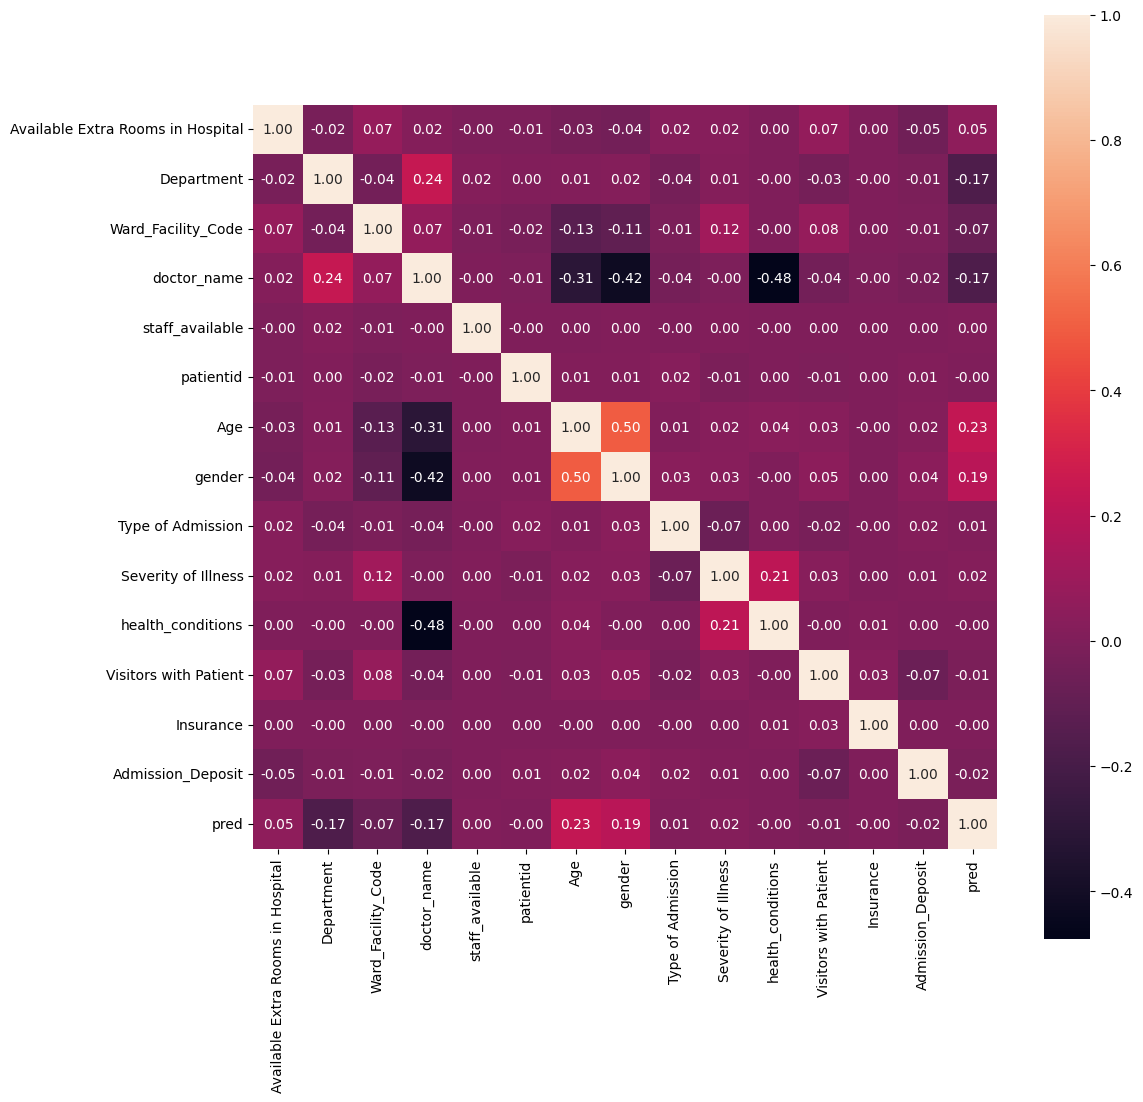

In [189]:
matrizCorrmat = dftrain.corr()
f,ax = plt.subplots(figsize =(12,12))
sns.heatmap(matrizCorrmat, vmax = 1 ,square=True, annot= True,fmt= '.2f')
plt.show()

para pred... "Age" es el valor que más tiene correlación, seguido de "gender" y un poco de "Available Extra Rooms in Hospital" y una más como "Department"

Repito la normalización para "dftest" y lo guardo en "resultado"


In [190]:
df = dftest["Age"].str.split('-', expand=True)
df[0] = df[0].astype("int32")
df[1] = df[1].astype("int32")
df = ((df[0]+df[1])/2)
df = df.astype("int32")
dftest["Age"] = df

dftest.Department = le.fit_transform(dftest.Department)
dftest.Ward_Facility_Code = le.fit_transform(dftest.Ward_Facility_Code)
dftest.doctor_name = le.fit_transform(dftest.doctor_name)
#dftest.Age = le.fit_transform(dftest.Age)
dftest.gender = le.fit_transform(dftest.gender)
dftest['Type of Admission'] = le.fit_transform(dftest['Type of Admission'])
dftest['Severity of Illness'] = le.fit_transform(dftest['Severity of Illness'])
dftest.health_conditions = le.fit_transform(dftest.health_conditions)
dftest.Insurance = le.fit_transform(dftest.Insurance)

resultado = dftest[["Age","gender","Available Extra Rooms in Hospital","Department"]]

# DecisionTree

probamos DecisionTree en "dftest"

importo Decision

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

lo guardo en tree

In [192]:
tree = DecisionTreeClassifier()

elijo las columas de acuerdo a la matriz de correlación

In [193]:
X = dftrain[["Age","gender","Available Extra Rooms in Hospital","Department"]]
y = dftrain["pred"]

declaro las varialbes

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

lo pongo a entrenar con .fit

In [195]:
tree.fit(X, y)

DecisionTreeClassifier()

ya entrenó ;)

accuracy?

In [196]:
from sklearn.metrics import accuracy_score

y_train_pred = tree.predict(X_train)

y_test_pred = tree.predict(X_test)

print("Accuracy sobre conjunto de Train:", accuracy_score(y_train_pred,y_train))
print("Accuracy sobre conjunto de Test:", accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.69381143065162
Accuracy sobre conjunto de Test: 0.693059866962306


ok ahora a predecir con el mismo X_test

In [197]:
prediccion = tree.predict(X_test)

que tan bien estamos?

In [198]:
print(f'{tree.score(X_test,y_test):.2%}')

69.31%


bien! tengo un 69.31% correcto

ahora con "dftest"

In [199]:
prediccion = tree.predict(resultado)

y lo guardo en un csv

In [200]:
dfresultado = pd.DataFrame(list(prediccion), columns=['pred'])
dfresultado.to_csv("faculopez-code.csv", index=False, sep=',')

# KNeighbors


ahora con KNeighbors pero mas rápido

In [201]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [202]:
knn = KNeighborsClassifier() 

In [203]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y,test_size=0.2195121951219512, random_state=11)
#divide datos de prueba y datos de entrenamiento para 90.000 filas ;)

In [204]:
knn.fit(xtrain, ytrain)#carga la muestra de entrenamiento y los objetivos también

KNeighborsClassifier()

In [205]:
"""prediccion = knn.predict(xtest)"""

'prediccion = knn.predict(xtest)'

In [206]:
#accuraciy

y_train_pred = tree.predict(xtrain)

y_test_pred = tree.predict(xtest)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,ytrain))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,ytest))

Accuracy sobre conjunto de Train: 0.693971875
Accuracy sobre conjunto de Test: 0.6921111111111111


In [207]:
"""print(f'{knn.score(xtest,ytest):.2%}')"""

"print(f'{knn.score(xtest,ytest):.2%}')"

ok 67.10% no está mal..

de igual forma subiré este resultado

In [208]:
"""prediccion = knn.predict(resultado)"""

'prediccion = knn.predict(resultado)'

In [209]:
"""dfresultado = pd.DataFrame(list(prediccion), columns=['pred'])
dfresultado.to_csv("faculopez-code.csv", index=False, sep=',')"""

'dfresultado = pd.DataFrame(list(prediccion), columns=[\'pred\'])\ndfresultado.to_csv("faculopez-code.csv", index=False, sep=\',\')'